## Titanic Yarışması

Bu uygulamada klasik Titanic yarışması için görev tamamlanmıştır. 

In [1]:
!pip3 install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 8.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ | / done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 58.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 69.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 49.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 68.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 36.6 MB/s et

## Kütüphaneleri İçe Aktar 

In [2]:
#import pycaret 
#print(pycaret.__version__)

In [3]:
import pandas as pd
from pycaret import classification

## Veri Setlerini Yükle

In [4]:
gender_df=pd.read_csv('/kaggle/input/titanic/gender_submission.csv')
train_df=pd.read_csv('/kaggle/input/titanic/train.csv')
test_df=pd.read_csv('/kaggle/input/titanic/test.csv')

## 3. Keşifsel Veri Analizi (EDA)

In [5]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 4. Model Oluşturma

In [6]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
clf1=classification.setup(data=train_df,
    target='Survived',
    numeric_imputation='median',
    ignore_features=['PassengerId', 'Name',
                     'Ticket', 'Cabin'],
                          categorical_features=['Pclass',
                                                'Embarked','Sex'],
    normalize=True,
    session_id=42
                         )

,Description,Value
0,Session id,42
1,Target,Survived
2,Target type,Binary
3,Original data shape,"(891, 12)"
4,Transformed data shape,"(891, 12)"
5,Transformed train set shape,"(623, 12)"
6,Transformed test set shape,"(268, 12)"
7,Ignore features,4
8,Numeric features,4
9,Categorical features,3


### 5. Değerlendirme

In [8]:
classification.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8315,0.8635,0.7201,0.8266,0.7660,0.6356,0.6426,2.0860
gbc,Gradient Boosting Classifier,0.8235,0.8583,0.6908,0.8281,0.7485,0.6149,0.6247,0.1340
lightgbm,Light Gradient Boosting Machine,0.8219,0.8618,0.7286,0.7972,0.7571,0.6175,0.6230,0.3210
rf,Random Forest Classifier,0.8187,0.8463,0.7326,0.7869,0.7559,0.6123,0.6160,0.2170
ada,Ada Boost Classifier,0.8057,0.8369,0.7330,0.7613,0.7423,0.5873,0.5924,0.1330
et,Extra Trees Classifier,0.8027,0.8306,0.7120,0.7651,0.7348,0.5783,0.5820,0.1840
xgboost,Extreme Gradient Boosting,0.8027,0.8506,0.7203,0.7635,0.7377,0.5802,0.5841,0.1040
knn,K Neighbors Classifier,0.8026,0.8324,0.6699,0.7900,0.7215,0.5707,0.5783,0.0750
lr,Logistic Regression,0.8010,0.8520,0.7033,0.7650,0.7294,0.5730,0.5774,0.7490
ridge,Ridge Classifier,0.7898,0.8528,0.6824,0.7510,0.7121,0.5479,0.5518,0.0620


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

## En İyi Modeli Cross Val Yaparak Değerlendirme

In [9]:
classification_catboost=classification.create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8413,0.8900,0.7500,0.8182,0.7826,0.6580,0.6595
1,0.7778,0.8900,0.5833,0.7778,0.6667,0.5051,0.5168
2,0.8730,0.8510,0.7083,0.9444,0.8095,0.7172,0.7339
3,0.8387,0.9242,0.8261,0.7600,0.7917,0.6605,0.6620
4,0.8710,0.8377,0.7083,0.9444,0.8095,0.7149,0.7319
5,0.8871,0.8882,0.8333,0.8696,0.8511,0.7602,0.7607
6,0.8065,0.8849,0.6667,0.8000,0.7273,0.5792,0.5850
7,0.8387,0.7489,0.6667,0.8889,0.7619,0.6437,0.6589
8,0.8226,0.8871,0.7500,0.7826,0.7660,0.6232,0.6236


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

## Fine Tuning (İnce Ayar)

In [10]:
tuned_catboost=classification.tune_model(classification_catboost)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8571,0.8697,0.7500,0.8571,0.8000,0.6897,0.6934
1,0.8095,0.8718,0.6250,0.8333,0.7143,0.5758,0.5892
2,0.8571,0.8851,0.7083,0.8947,0.7907,0.6845,0.6952
3,0.8387,0.9119,0.8261,0.7600,0.7917,0.6605,0.6620
4,0.8710,0.8520,0.6667,1.0000,0.8000,0.7103,0.7421
5,0.9032,0.9057,0.7917,0.9500,0.8636,0.7896,0.7975
6,0.7903,0.8717,0.6250,0.7895,0.6977,0.5405,0.5491
7,0.8065,0.7774,0.6250,0.8333,0.7143,0.5724,0.5860
8,0.8387,0.8509,0.7083,0.8500,0.7727,0.6493,0.6558


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


## En İyi Parametreleri Yazdır

In [11]:
print(tuned_catboost.get_all_params())


{'nan_mode': 'Min', 'eval_metric': 'Logloss', 'iterations': 290, 'sampling_frequency': 'PerTree', 'leaf_estimation_method': 'Newton', 'random_score_type': 'NormalWithModelSizeDecrease', 'grow_policy': 'SymmetricTree', 'penalties_coefficient': 1, 'boosting_type': 'Plain', 'model_shrink_mode': 'Constant', 'feature_border_type': 'GreedyLogSum', 'bayesian_matrix_reg': 0.10000000149011612, 'eval_fraction': 0, 'force_unit_auto_pair_weights': False, 'l2_leaf_reg': 5, 'random_strength': 0.6000000238418579, 'rsm': 1, 'boost_from_average': False, 'model_size_reg': 0.5, 'pool_metainfo_options': {'tags': {}}, 'subsample': 0.800000011920929, 'use_best_model': False, 'class_names': [0, 1], 'random_seed': 42, 'depth': 7, 'posterior_sampling': False, 'border_count': 254, 'classes_count': 0, 'auto_class_weights': 'None', 'sparse_features_conflict_fraction': 0, 'leaf_estimation_backtracking': 'AnyImprovement', 'best_model_min_trees': 1, 'model_shrink_rate': 0, 'min_data_in_leaf': 1, 'loss_function': 'Lo

## Performans ROC Curve

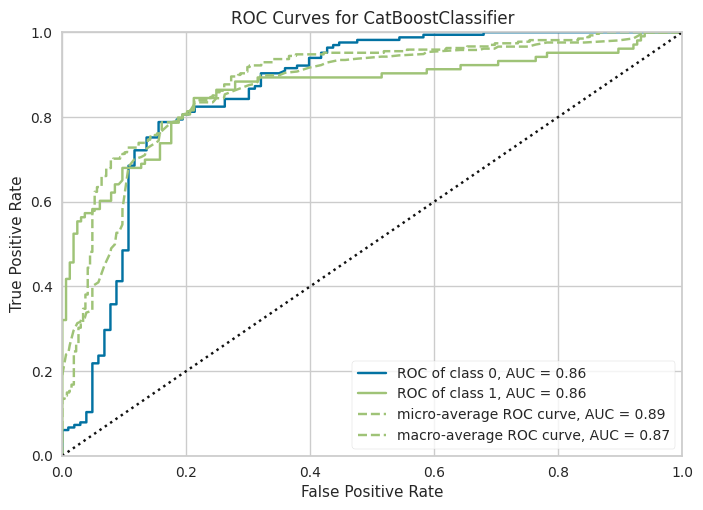

In [12]:
classification.plot_model(tuned_catboost)

## Öğrenme Eğrisi

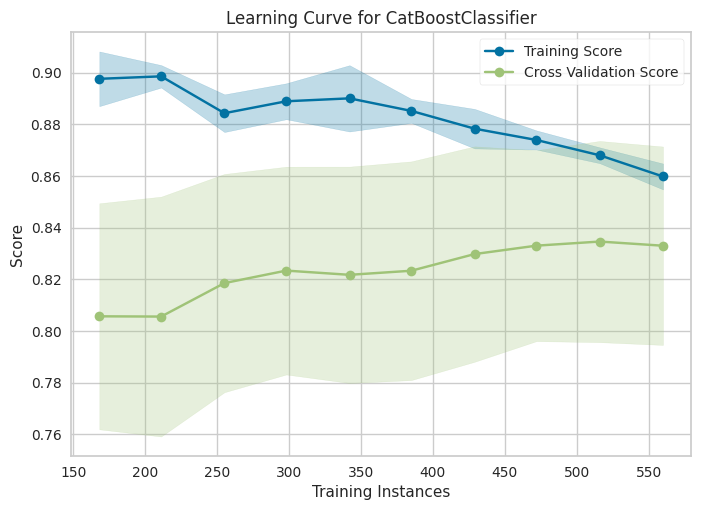

In [13]:
clf1.plot_model(tuned_catboost,plot='learning')

## Hata Matrisi

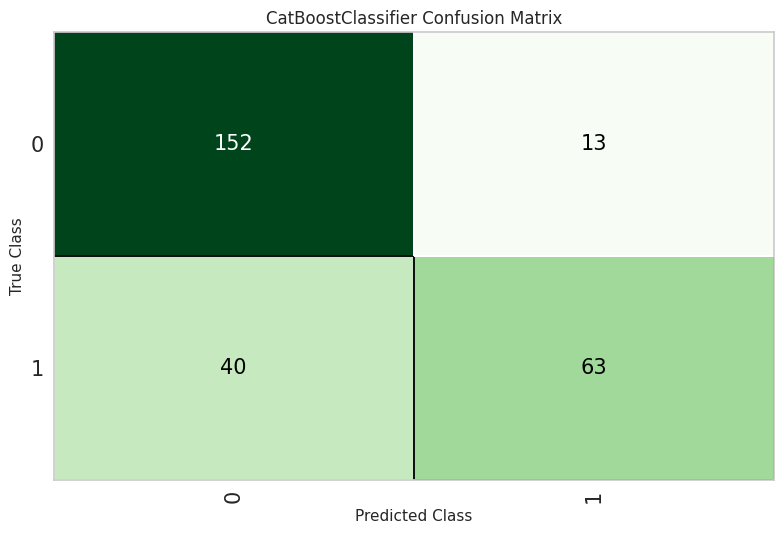

In [14]:
clf1.plot_model(tuned_catboost,plot='confusion_matrix')

# Özellik Önem Grafiği

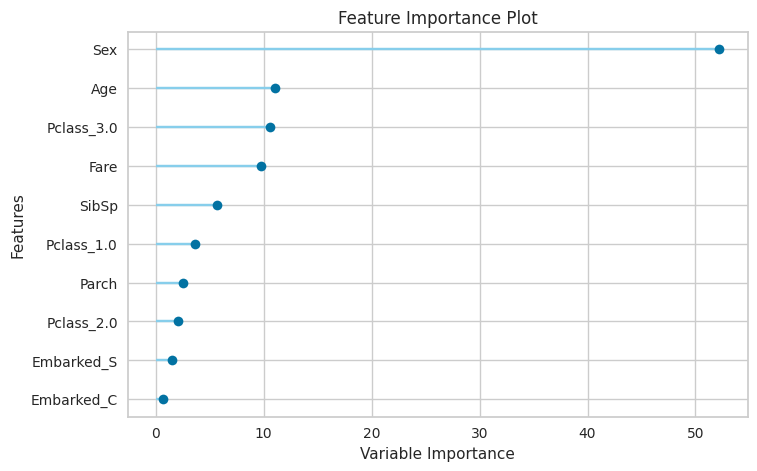

In [15]:
clf1.plot_model(tuned_catboost,plot='feature')

In [16]:
classification.evaluate_model(tuned_catboost)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [17]:
predictions=clf1.predict_model(tuned_catboost,data=test_df)
predictions.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,prediction_label,prediction_score
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,0.8359
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0.5697
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,0.8267
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0.8217
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0.5833
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,0,0.7394
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,1,0.6839
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,0,0.7678
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,1,0.6858
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,0,0.7873


In [18]:
#Submizzison dosyasına yükle 
gender_df['Survived'] = round(predictions['prediction_label']).astype(int)
gender_df.to_csv('submission.csv',index=False)
gender_df.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0
